# Measuring Area from Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Cleaning and binarizing test image

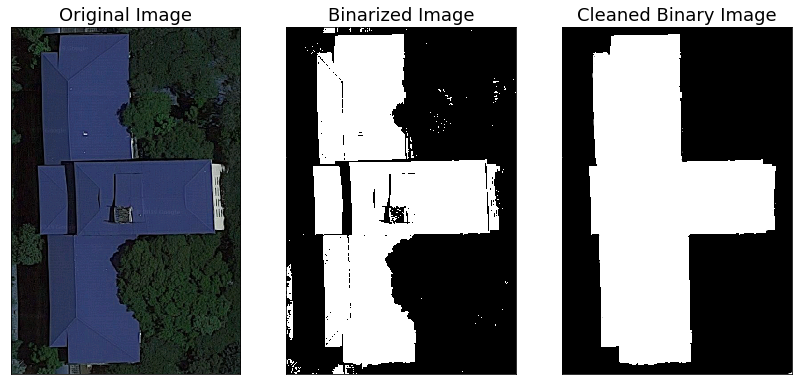

In [4]:
orig = cv2.imread('orig.png')
binary = cv2.imread('uncleaned.png',0)
img = cv2.imread('cleaned.png',0)
edges1 = cv2.Laplacian(img,cv2.CV_64F) 
edges2 = cv2.Canny(img,200,100) 
edges1[edges1!=0] = 1 #for visualization purposes (does not affect calculations)

plt.figure(figsize=(14,10))
plt.subplot(131),plt.imshow(orig)
plt.title('Original Image',fontsize=18) , plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(binary,cmap='gray')
plt.title('Binarized Image',fontsize=18) , plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img,cmap='gray')
plt.title('Cleaned Binary Image',fontsize=18) , plt.xticks([]), plt.yticks([])
# plt.savefig('main_lib.png',dpi=300,bbox_inches='tight')
plt.show()

## Edge detection using Canny and Laplacian functions from OpenCV

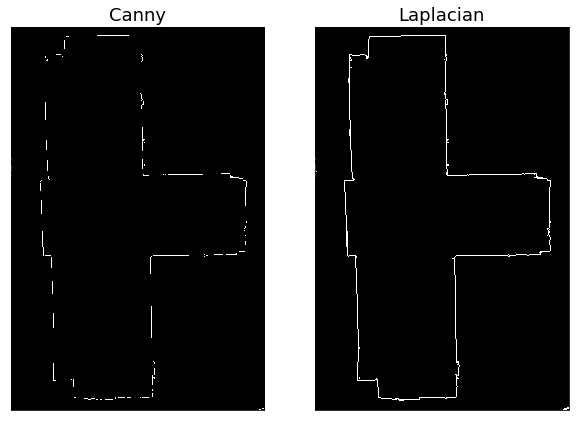

In [5]:
plt.figure(figsize=(10,8))

plt.subplot(121),plt.imshow(edges2,'gray')
plt.title('Canny',fontsize=18) , plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges1,'gray')
plt.title('Laplacian',fontsize=18) , plt.xticks([]), plt.yticks([])
# plt.savefig('lib_edges.png',dpi=300,bbox_inches='tight')
plt.show()

## Getting Centroid of shape

In [15]:
edge_x,edge_y = np.nonzero(edges1)

x_center = np.sum(edge_x)/len(edge_x)
y_center = np.sum(edge_y)/len(edge_y)

## Subtracting centroid from coordinates of edge

In [16]:
new_x = edge_x-x_center
new_y = edge_y-y_center

## Converting new edge coordinates to polar coordinates

In [17]:
r = np.sqrt(new_x**2 + new_y**2)
theta = np.arctan2(new_y,new_x)

In [18]:
edge_coords = []

for i in range(len(edge_x)):
    edge_coords.append([theta[i],edge_x[i],edge_y[i]])

## Sorting coordinates in increasing theta

In [19]:
def getKey(item):
    return item[0]

sorted_coords = np.array(sorted(edge_coords, key=getKey))

In [20]:
sorted_x = sorted_coords[:,1]
sorted_y = sorted_coords[:,2]

## Implementing Green's Theorem

In [21]:
A = 0
for j in range(len(sorted_x)):
    if j == len(sorted_x)-1:
        A += ((sorted_x[j]*sorted_y[0]) - (sorted_x[0]*sorted_y[j]))
    else:
        A += ((sorted_x[j]*sorted_y[j+1]) - (sorted_x[j+1]*sorted_y[j]))
        
A = A/2